## Q3. SALES PREDICTION USING PYTHON

**-> Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.**

**-> In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.**

In [19]:
import numpy as n
import pandas as p
import matplotlib.pyplot as m
import seaborn as s
m.style.use("dark_background")

### Data Overview:-

In [20]:
sale=p.read_csv("Sales.csv")
sale.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
sale.shape

(200, 4)

In [22]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
sale.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Data Wrangling:-

In [24]:
sale.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

###### here no need to clean data as there is no null values

### Data Analysis:-

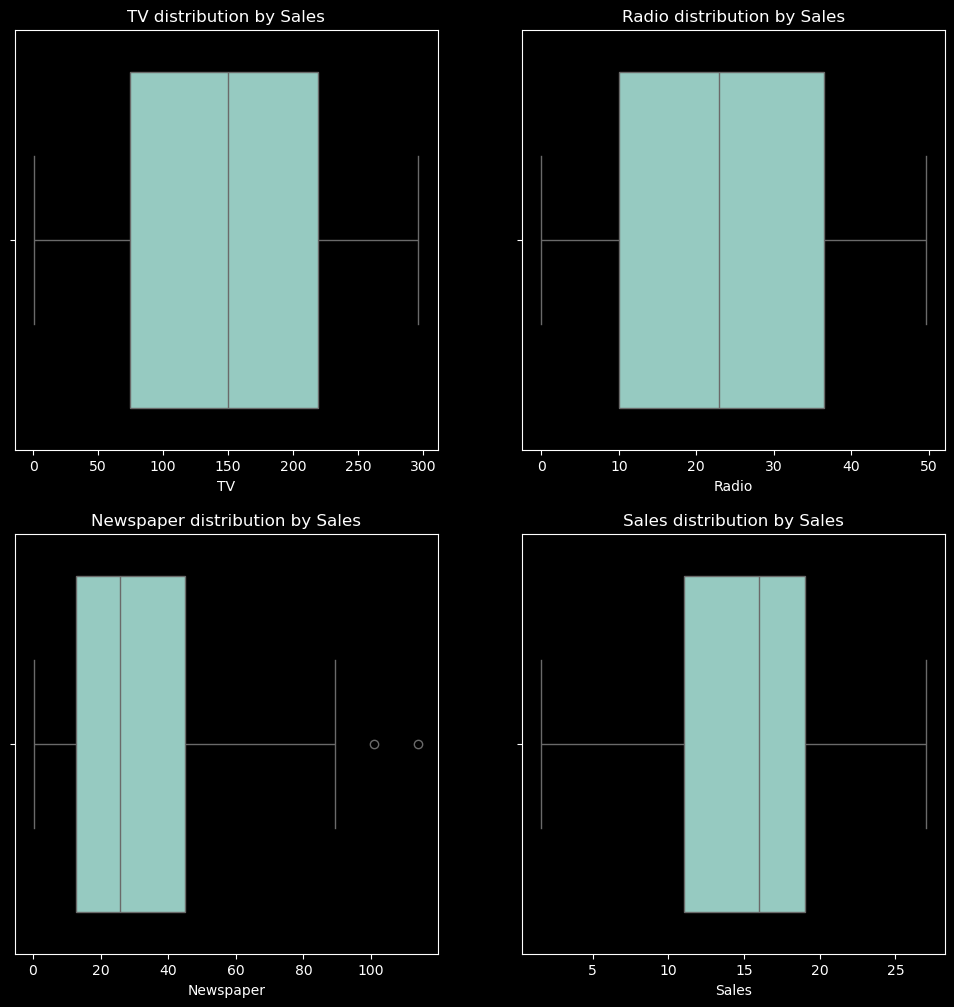

In [25]:
def box_plot(y):
    s.boxplot(data=sale,x=y)
m.figure(figsize=(12,12))
for i,j in enumerate(sale.columns[:4]):
    m.subplot(2,2,i+1)
    box_plot(j)
    m.title(f"{j} distribution by Sales")
m.show()

###### Here the expenditure on TV advertising is much more comparewd to Radio and Newspaper advertising modes

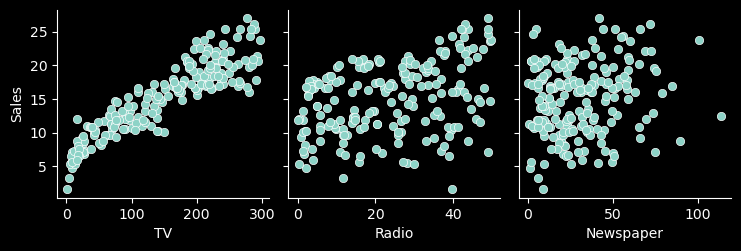

In [26]:
s.pairplot(sale,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

###### here the sale increases uniformly on more expenditures on TV advertising where as other Advertising modes are not so uniform

<Axes: >

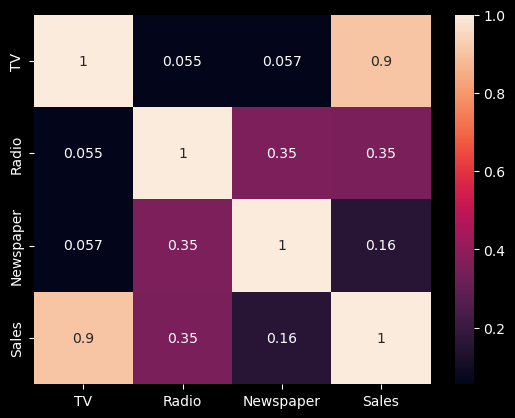

In [27]:
s.heatmap(sale.corr(),annot=True)

###### here we see TV advertsing mode increases the sales most than other advertising modes

### Train and Test Data:-

In [28]:
X=sale['TV']
y=sale['Sales']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [31]:
import statsmodels.api as sm

In [32]:
X_train_sm=sm.add_constant(X_train)
a=sm.OLS(y_train,X_train_sm).fit()
a.params

const    7.150595
TV       0.053389
dtype: float64

In [33]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     540.0
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           1.51e-49
Time:                        18:21:21   Log-Likelihood:                -307.76
No. Observations:                 140   AIC:                             619.5
Df Residuals:                     138   BIC:                             625.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1506      0.382     18.699      0.000       6.394       7.907
TV             0.0534      0.002     23.237      0.000       0.049       0.058
==============================================================================
Omnibus:                        0.125   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.112
Skew:                           0.064   Prob(JB):                        0.945
Kurtosis:                       2.947   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

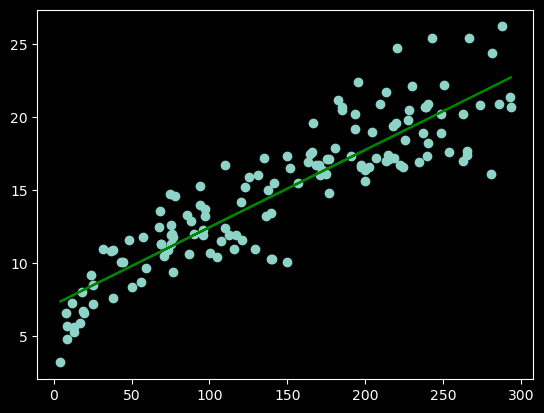

In [34]:
m.scatter(X_train,y_train)
m.plot(X_train,7.150+0.053*X_train,'g')

In [35]:
prediction=a.predict(X_train_sm)

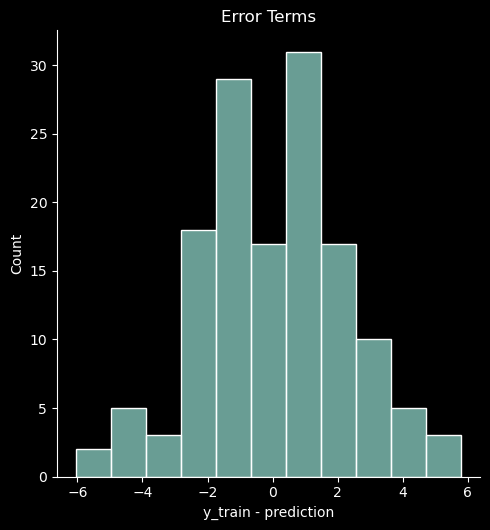

In [36]:
s.displot(y_train-prediction)
m.title("Error Terms")
m.xlabel("y_train - prediction")
m.show()

In [37]:
X_test_sm=sm.add_constant(X_test)
prediction=a.predict(X_test_sm)

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
n.sqrt(mean_squared_error(y_test,prediction))

2.5425056458105124

In [40]:
r2_score(y_test,prediction)

0.828874316658013

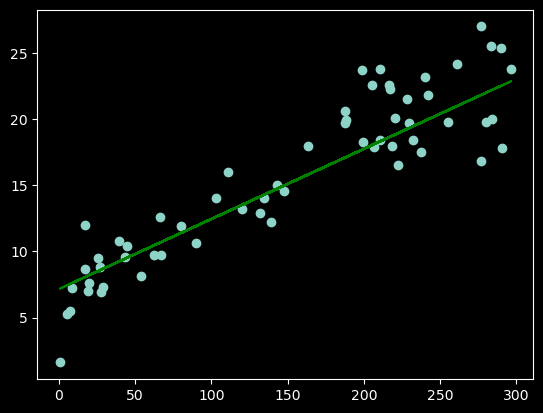

In [41]:
m.scatter(X_test,y_test)
m.plot(X_test,7.150+0.053*X_test,'g')